### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


### Дисциплина: Информационный анализ данных

##### Студент:  Ильин Никита 
##### Группа:   НФИбд-01-19

## Москва 2022
***

Вариант 1 

Annealing Data Set 

Название файла: anneal.data 

Ссылка: https://archive.ics.uci.edu/ml/datasets/Annealing 

Класс: classes (столбец No 39) 

Метод обработки пропущенных значений – среднее значение признака 

Метод нормализации признаков – масштабирование на интервал [0, 1] 

Алгоритм снижения размерности данных – удаление признаков с более низкой дисперсией 

Дополнительные базовые классификаторы: 

⁃            наивный байесовский классификатор 

⁃            классификатор ближайших соседей (к-во соседей = 3) 

Комбинированный классификатор: VotingClassifier 

Ансамблевые классификаторы: BaggingClassifier, RandomForestClassifier 

Показатель качества модели – F-мера (f1) 

Для закрепленного за Вами варианта лабораторной работы:

1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов. 

2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании.

3.	Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных пять признаков.

4.	Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.

5.	Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

6.	Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.

7. 	Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании. 

8. 	Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании. 

9. 	Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок. 

### Выполнение

1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов. 


In [788]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [789]:
data = pd.read_csv('anneal.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


In [790]:
data.dtypes

0      object
1      object
2      object
3       int64
4       int64
5      object
6      object
7      object
8       int64
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
32    float64
33    float64
34      int64
35     object
36      int64
37     object
38     object
dtype: object


2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании.

In [791]:
data = data.replace('?', np.NaN)

я не знал что делать с "-", поэтому заменил на 0, не уверен, что так нужно, но судя по странности датасета - это норма

In [792]:
data = data.replace('-', 0)

In [793]:
data[38].isnull().sum(axis=0)

0


   
   1. family:		--,GB,GK,GS,TN,ZA,ZF,ZH,ZM,ZS  
   2. product-type:	C, H, G
   3. steel:		-,R,A,U,K,M,S,W,V
   4. carbon:		continuous
   5. hardness:	continuous
   6. temper_rolling:	-,T
   7. condition:	-,S,A,X
   8. formability:	-,1,2,3,4,5
   9. strength:	continuous
   10. non-ageing:	-,N
   11. surface-finish:	P,M,-
   12. surface-quality: -,D,E,F,G
   13. enamelability:	-,1,2,3,4,5
   14. bc:		Y,-
   15. bf:		Y,-
   16. bt:		Y,-
   17. bw/me:		B,M,-
   18. bl:		Y,-
   19. m:		Y,-
   20. chrom:		C,-
   21. phos:		P,-
   22. cbond:		Y,-
   23. marvi:		Y,-
   24. exptl:		Y,-
   25. ferro:		Y,-
   26. corr:		Y,-
   27. blue/bright/varn/clean:		B,R,V,C,-
   28. lustre:		Y,-
   29. jurofm:		Y,-
   30. s:		Y,-
   31. p:		Y,-
   32. shape:		COIL, SHEET
   33. thick:		continuous
   34. width:		continuous
   35. len:		continuous
   36. oil:		-,Y,N
   37. bore:		0000,0500,0600,0760
   38. packing:	-,1,2,3
   classes:        1,2,3,4,5,U

In [794]:
from sklearn.preprocessing import LabelEncoder
from itertools import chain
lb_make = LabelEncoder()
for i in chain(range(0, 12), range(13, 36)):
    data[i] = lb_make.fit_transform(data[i])




Я несколько часов не мог понять, почему у меня ничего не работает, а оказалось в метке класса есть буква U, поэтому строкой ниже я избавился от нее. Я понимаю, что так скорее всего нельзя, но сомневаюсь, что в таком странном датасете возможно сделать иначе.

In [795]:
data[38] = lb_make.fit_transform(data[38])

In [796]:
data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,2,0,0,4,0,1,1,4,0,1,...,0,0,0,13,39,0,2,0,NaN,2
1,2,0,3,0,0,1,1,1,0,1,...,0,0,0,44,39,0,2,0,NaN,2
2,2,0,3,0,0,1,1,1,0,1,...,0,0,1,13,62,15,2,0,NaN,2
3,2,0,0,0,3,0,2,4,0,1,...,0,0,0,42,25,0,2,0,NaN,2
4,2,0,0,0,3,0,2,4,0,1,...,0,0,1,17,16,3,2,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2,0,0,0,2,0,2,4,0,1,...,0,0,0,22,5,0,1,0,NaN,2
794,2,0,7,0,0,1,1,0,0,1,...,0,0,1,12,62,22,2,0,NaN,2
795,2,0,0,0,0,1,1,1,0,1,...,0,0,0,4,38,0,2,0,NaN,2
796,2,0,0,0,0,1,1,1,0,1,...,0,0,1,44,39,22,2,0,NaN,2



Метод обработки пропущенных значений – среднее значение признака 

In [797]:
data = data.fillna(data.mean(numeric_only=True))

In [798]:
data = data.astype('float')
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
dtype: object

столбец 37 оказался пустым(хотя по описанию в нем могли быть значения, но )

In [799]:
#data = data.drop(37, axis=1)

In [800]:
data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,2.0,0.0,0.0,4.0,0.0,1.0,1.0,4.0,0.0,1.0,...,0.0,0.0,0.0,13.0,39.0,0.0,2.0,0.0,NaN,2.0
1,2.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,44.0,39.0,0.0,2.0,0.0,NaN,2.0
2,2.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,13.0,62.0,15.0,2.0,0.0,NaN,2.0
3,2.0,0.0,0.0,0.0,3.0,0.0,2.0,4.0,0.0,1.0,...,0.0,0.0,0.0,42.0,25.0,0.0,2.0,0.0,NaN,2.0
4,2.0,0.0,0.0,0.0,3.0,0.0,2.0,4.0,0.0,1.0,...,0.0,0.0,1.0,17.0,16.0,3.0,2.0,0.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2.0,0.0,0.0,0.0,2.0,0.0,2.0,4.0,0.0,1.0,...,0.0,0.0,0.0,22.0,5.0,0.0,1.0,0.0,NaN,2.0
794,2.0,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,12.0,62.0,22.0,2.0,0.0,NaN,2.0
795,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,4.0,38.0,0.0,2.0,0.0,NaN,2.0
796,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,44.0,39.0,22.0,2.0,0.0,NaN,2.0



3.	Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных пять признаков.


удаление признаков с более низкой дисперсией 

In [801]:
X = data.drop(38, axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,2.0,0.0,0.0,4.0,0.0,1.0,1.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,13.0,39.0,0.0,2.0,0.0,NaN
1,2.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,44.0,39.0,0.0,2.0,0.0,NaN
2,2.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,13.0,62.0,15.0,2.0,0.0,NaN
3,2.0,0.0,0.0,0.0,3.0,0.0,2.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,42.0,25.0,0.0,2.0,0.0,NaN
4,2.0,0.0,0.0,0.0,3.0,0.0,2.0,4.0,0.0,1.0,...,0.0,0.0,0.0,1.0,17.0,16.0,3.0,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2.0,0.0,0.0,0.0,2.0,0.0,2.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,22.0,5.0,0.0,1.0,0.0,NaN
794,2.0,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,12.0,62.0,22.0,2.0,0.0,NaN
795,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.0,38.0,0.0,2.0,0.0,NaN
796,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,44.0,39.0,22.0,2.0,0.0,NaN


In [802]:
Xvar = X.var()
Xvar

0         0.319143
1         0.000000
2         5.039103
3         3.153645
4         1.982409
5         0.130541
6         0.290364
7         2.017706
8         1.186133
9         0.105007
10        0.009937
11        1.836731
12        0.256410
13        0.001253
14        0.126162
15        0.071748
16        0.610247
17        0.141558
18        0.000000
19        0.028026
20        0.008706
21        0.078050
22        0.000000
23        0.002503
24        0.031559
25        0.000000
26        0.039924
27        0.053278
28        0.000000
29        0.000000
30        0.000000
31        0.248704
32      171.177733
33      299.175492
34       83.700388
35        0.142007
36    15577.919076
37        0.111111
dtype: float64

In [803]:
Xvar2 = sorted(Xvar, reverse=True)[:5]
Xvar2

[15577.919076235088,
 299.1754920551049,
 171.1777326000073,
 83.70038804665336,
 5.0391034046848695]

In [804]:
X2 = pd.DataFrame()


In [805]:
for i in range(len(Xvar2)):
    for k in range(len(Xvar)):
        if Xvar2[i] == Xvar[k]:
            print(k)
            X2[k] = X[k]


36
33
32
34
2


In [806]:
X2

,36,33,32,34,2
0,0.0,39.0,13.0,0.0,0.0
1,0.0,39.0,44.0,0.0,3.0
2,0.0,62.0,13.0,15.0,3.0
3,0.0,25.0,42.0,0.0,0.0
4,0.0,16.0,17.0,3.0,0.0
...,...,...,...,...,...
793,0.0,5.0,22.0,0.0,0.0
794,0.0,62.0,12.0,22.0,7.0
795,0.0,38.0,4.0,0.0,0.0
796,0.0,39.0,44.0,22.0,0.0



4.	Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.


масштабирование на интервал [0, 1] 

In [825]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X2))

,0,1,2,3,4
0,0.0,0.582090,0.270833,0.000000,0.000000
1,0.0,0.582090,0.916667,0.000000,0.428571
2,0.0,0.925373,0.270833,0.681818,0.428571
3,0.0,0.373134,0.875000,0.000000,0.000000
4,0.0,0.238806,0.354167,0.136364,0.000000
...,...,...,...,...,...
793,0.0,0.074627,0.458333,0.000000,0.000000
794,0.0,0.925373,0.250000,1.000000,1.000000
795,0.0,0.567164,0.083333,0.000000,0.000000
796,0.0,0.582090,0.916667,1.000000,0.000000


In [826]:
X.rename(columns={0: 36, 1: 33, 2: 32, 3: 34, 4: 2}, inplace=True)
X

,36,33,32,34,2
0,0.0,0.582090,0.270833,0.000000,0.000000
1,0.0,0.582090,0.916667,0.000000,0.428571
2,0.0,0.925373,0.270833,0.681818,0.428571
3,0.0,0.373134,0.875000,0.000000,0.000000
4,0.0,0.238806,0.354167,0.136364,0.000000
...,...,...,...,...,...
793,0.0,0.074627,0.458333,0.000000,0.000000
794,0.0,0.925373,0.250000,1.000000,1.000000
795,0.0,0.567164,0.083333,0.000000,0.000000
796,0.0,0.582090,0.916667,1.000000,0.000000



5.	Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.


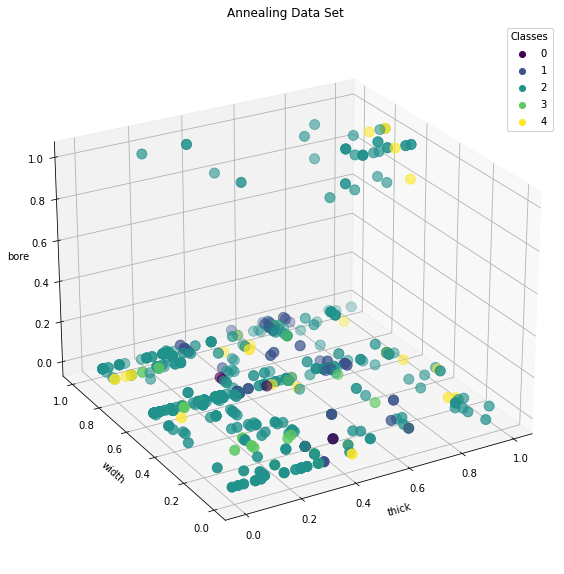

In [810]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

Y = data[38]
xs = X[32]
ys = X[33]
zs = X[36]

scatter = ax.scatter( xs, ys, zs, c=Y,s=100 )
ax.set_xlabel("thick")
ax.set_ylabel("width")
ax.set_zlabel("bore")
ax.set_title("Annealing Data Set")
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.view_init( azim=-120, elev=25 )


6.	Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.


In [811]:
X.shape, Y.shape


((798, 5), (798,))

In [812]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=666)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((558, 5), (558,), (240, 5), (240,))

In [813]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=5)  
dt_clf.fit(X_train, Y_train)
dt_clf.score(X_test, Y_test)

0.8333333333333334

In [814]:
def plot_decision_boundary(model, X,axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    x2 = np.full(len(x0.ravel()),X[32].mean())
    x3 = np.full(len(x0.ravel()),X[34].mean())
    x4 = np.full(len(x0.ravel()),X[2].mean())
    X_new = np.c_[x0.ravel(), x1.ravel(),x2,x3,x4]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9', '#A8D8FF', '#BDFFD9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

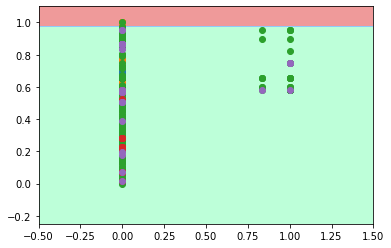

In [815]:
plot_decision_boundary(dt_clf,X, axis=[-0.5, 1.5, -0.25, 1.1])
plt.scatter(X[Y==0][36], X[Y==0][33])
plt.scatter(X[Y==1][36], X[Y==1][33])
plt.scatter(X[Y==2][36], X[Y==2][33])
plt.scatter(X[Y==3][36], X[Y==3][33])
plt.scatter(X[Y==4][36], X[Y==4][33])
plt.show()

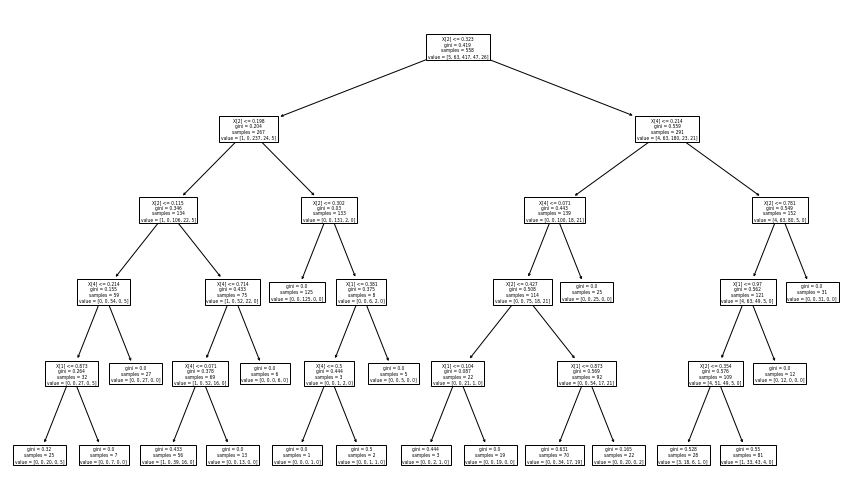

In [816]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 9))
plot_tree(dt_clf); 

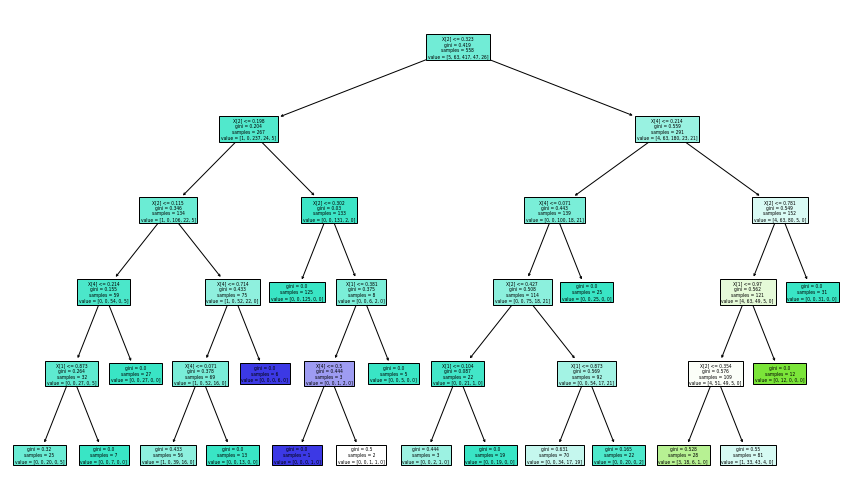

In [817]:
plt.figure(figsize=(15, 9))
plot_tree(dt_clf,filled=True); 


7. 	Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании. 


Дополнительные базовые классификаторы: 

⁃            наивный байесовский классификатор 

⁃            классификатор ближайших соседей (к-во соседей = 3) 

Комбинированный классификатор: VotingClassifier 

Показатель качества модели – F-мера (f1) 

In [818]:
from sklearn.metrics import f1_score

In [819]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,Y_train.values.ravel())
Y_pred = nbc.predict(X_test)
f1_score(Y_test, Y_pred, average='micro')

0.16666666666666666

In [820]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, Y_train)
Y_pred = knn_clf.predict(X_test)
f1_score(Y_test, Y_pred, average='micro')

0.8125

In [821]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('nbc', GaussianNB()), 
    ('knn_clf', KNeighborsClassifier(n_neighbors=3)),
    ('dt_clf', DecisionTreeClassifier(max_depth=5))],
                             voting='hard')

voting_clf.fit(X_train, Y_train)
voting_clf.fit(X_train, Y_train)
Y_pred = voting_clf.predict(X_test)
f1_score(Y_test, Y_pred, average='micro')

0.8208333333333333


8. 	Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании. 


Ансамблевые классификаторы: BaggingClassifier, RandomForestClassifier 

In [822]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=50, max_samples=100,
                           bootstrap=True)
bagging_clf.fit(X_train, Y_train)

Y_pred = bagging_clf.predict(X_test)
f1_score(Y_test, Y_pred, average='micro')

0.8541666666666666

In [823]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, 
                                random_state=666, n_jobs=-1)
rf_clf.fit(X_train, Y_train)

Y_pred = rf_clf.predict(X_test)
f1_score(Y_test, Y_pred, average='micro')

0.8458333333333333


9. 	Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок. 



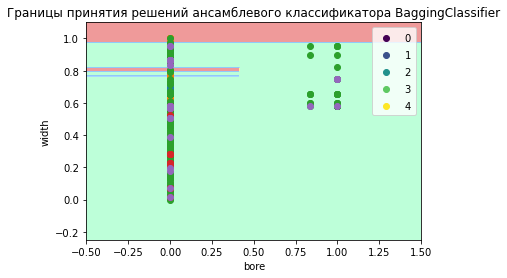

In [828]:
plot_decision_boundary(bagging_clf,X, axis=[-0.5, 1.5, -0.25, 1.1])

plt.scatter(X[Y==0][36], X[Y==0][33])
plt.scatter(X[Y==1][36], X[Y==1][33])
plt.scatter(X[Y==2][36], X[Y==2][33])
plt.scatter(X[Y==3][36], X[Y==3][33])
plt.scatter(X[Y==4][36], X[Y==4][33])

plt.legend(*scatter.legend_elements())
plt.xlabel("bore")
plt.ylabel("width")
plt.title("Границы принятия решений ансамблевого классификатора BaggingClassifier")

plt.show()

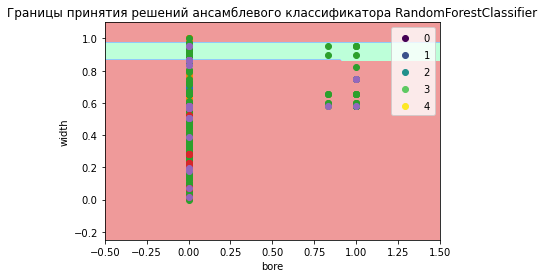

In [829]:
plot_decision_boundary(rf_clf,X, axis=[-0.5, 1.5, -0.25, 1.1])

plt.scatter(X[Y==0][36], X[Y==0][33])
plt.scatter(X[Y==1][36], X[Y==1][33])
plt.scatter(X[Y==2][36], X[Y==2][33])
plt.scatter(X[Y==3][36], X[Y==3][33])
plt.scatter(X[Y==4][36], X[Y==4][33])

plt.legend(*scatter.legend_elements())
plt.xlabel("bore")
plt.ylabel("width")
plt.title("Границы принятия решений ансамблевого классификатора RandomForestClassifier")

plt.show()
